### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data cleaning and aggregation

##### The sources of data are as follows:
- https://ourworldindata.org/energy-production-consumption
- https://ourworldindata.org/co2/country/philippines?country=~PHL

In [3]:
elec_df= pd.read_csv('data/electricity-generation.csv', parse_dates=['Year'])
co2_df = pd.read_csv('data/owid-co2-data.csv', parse_dates=['year'])

### Carbon dioxide emission per capita

In [4]:
co2_df = co2_df.loc[co2_df.country == 'Philippines'].reset_index(drop=True)

In [5]:
co2_df = co2_df[['year', 'co2_per_capita']]
co2_df['year'] = co2_df['year'].dt.year

### Electricity generation per capita

In [6]:
elec_df = elec_df.rename(columns={'Entity':'country', 'Code':'code', 'Year':'year',
                            'Electricity Generation (TWh)':'electricity_generation'})

##### Electricity production data from the Philippines

In [7]:
elec_df = elec_df.loc[elec_df['country'] == 'Philippines'].reset_index(drop=True)\

# remove non-relevant columns
elec_df.drop(['country', 'code'], inplace=True, axis='columns')

# get the year component of the date
elec_df['year'] = elec_df['year'].dt.year 

### Merge the dataframes

In [8]:
data = pd.merge(left=co2_df, right=elec_df, how='right', on='year').set_index('year')

In [9]:
data.head()

,co2_per_capita,electricity_generation
year,,
1985,0.514,22.766
1986,0.521,20.974
1987,0.567,22.642
1988,0.638,24.539
1989,0.645,25.573


## Visualization

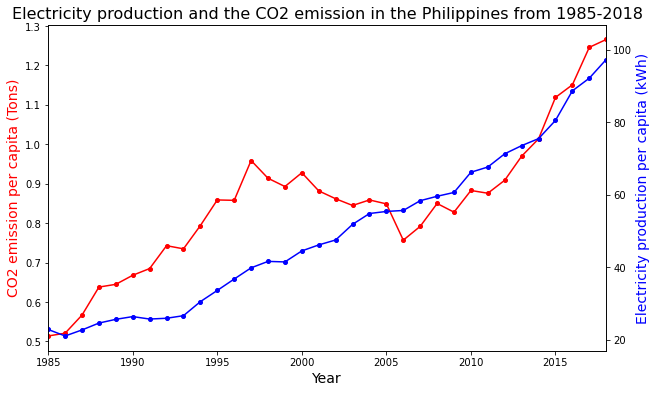

In [17]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(data.index, data['co2_per_capita'], label='CO2 emission per capita', color='red', marker='o', markersize=4)

# set axis label
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('CO2 emission per capita (Tons)', color='red', fontsize=14)

# set title
ax1.set_title('Electricity production and the CO2 emission in the Philippines from 1985-2018', fontsize=16)

# set axis limit
ax1.set_xlim(1985, 2018)

ax2 = plt.twinx(ax1)
ax2.plot(data.index, data['electricity_generation'], label='Electricity generation', color='blue', marker='o', markersize=4)

# set axis label
ax2.set_ylabel('Electricity production per capita (kWh)', color='blue', fontsize=14)


plt.show()

### Set a barplot that will instantly plot the data

In [48]:
def barplot_data(x, y, data=None):
    barplot = sns.barplot(x=x, y=y, data=data,
                      order=np.arange(1985, 2018, step=5),
                      palette='Greys')
    ax = plt.gca()
    
    ax.tick_params(axis="x", which = "both", top=False, bottom=False, labelsize='medium', rotation=45)
    ax.tick_params(axis="y", which = "both", right=False, left=False, labelsize='medium', labelleft=None)

    # annotate every bar 
    for patch in barplot.patches:
                 barplot.annotate("%.2f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2, patch.get_height()),
                     ha='center', va='center', fontsize=9, color='blue', xytext=(0, 20),
                     textcoords='offset points', rotation=0)

    # remove all the spines
    for spine in ['left', 'right', 'bottom', 'top']:
        ax.spines[spine].set_visible(False)
        
    plt.show()

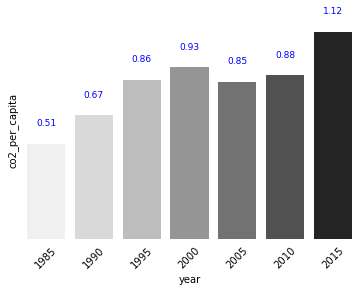

In [49]:
barplot_data(x=data.index, y='co2_per_capita', data=data)